# Appendix A: Import and Analysis of Data

In [1]:
#import relevant packages and libraries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})

#import the data using pandas by reading the data into a dataframe
data = pd.read_csv("salaries-by-region.csv", sep=',')

#delete unnecessary columns
data = data.drop("Mid-Career 10th Percentile Salary", axis=1)
data = data.drop("Mid-Career 25th Percentile Salary", axis=1)
data = data.drop("Mid-Career 75th Percentile Salary", axis=1)
data = data.drop("Mid-Career 90th Percentile Salary", axis=1)

#deleting unnecessary rows to only include Midwestern and Southern schools
data = data[data.Region != "California"]
data = data[data.Region != "Northeastern"]
data = data[data.Region != "Western"]

#rename columns to make them easier to work with
data.columns = ['school', 'region', 'start_median', 'mid_median']

#convert all dollar sign values from strings to numbers
dollar_col = ['start_median', 'mid_median']
for i in dollar_col:
    data[i] = data[i].str.replace("$","")
    data[i] = data[i].str.replace(",","")
    data[i] = pd.to_numeric(data[i])

#show the first 5 rows of data
data.head(5)

,school,region,start_median,mid_median
70,University of Notre Dame,Midwestern,56300.0,116000.0
71,University Of Chicago,Midwestern,53400.0,113000.0
72,Carleton College,Midwestern,47500.0,103000.0
73,Illinois Institute of Technology (IIT),Midwestern,56000.0,97800.0
74,Case Western Reserve University,Midwestern,56200.0,96500.0


In [2]:
#grouping the data into regions and calculating the mean start median salery per
#region using a library function
print("Number of schools per region")
data.groupby('region', as_index=False)['start_median'].count()

Number of schools per region


,region,start_median
0,Midwestern,71
1,Southern,79


In [3]:
#calculating the mean starting median salery per region using a library function
print("Mean starting median salary")
data.groupby('region', as_index=False)['start_median'].mean()

Mean starting median salary


,region,start_median
0,Midwestern,44225.352113
1,Southern,44521.518987


In [4]:
#finding the median of the starting median salary per region using a library function
print("Median starting median salary")
data.groupby('region')[['start_median']].median()

Median starting median salary


,start_median
region,
Midwestern,43100.0
Southern,43400.0


In [5]:
#finding the mode of the starting median salary for each region
#as there are more than one mode the output is more than one data array
mode_M = data.start_median.iloc[0:71].mode()
print("The modes for Midwestern schools =")
print("")
print(mode_M)
print("")

mode_S = data.start_median.iloc[71:150].mode()
print("The modes for Southern schools =")
print("")
print(mode_S)

The modes for Midwestern schools =

0    39800.0
1    41400.0
dtype: float64

The modes for Southern schools =

0    42600.0
1    43100.0
dtype: float64


In [6]:
#finding the st. deviation of the starting median salary per region 
#using a library function
print("Standard Deviation")
data.groupby('region')[['start_median']].std()

Standard Deviation


,start_median
region,
Midwestern,5068.240560
Southern,5626.099229


In [7]:
#finding the maximum value of the starting median salary per region 
#using a library function
print("Maximum Value")
data.groupby('region')[['start_median']].max()

Maximum Value


,start_median
region,
Midwestern,57100.0
Southern,64000.0


In [8]:
#finding the minimum value of the starting median salary per region 
#using a library function
print("Minimum Value")
data.groupby('region')[['start_median']].min()

Minimum Value


,start_median
region,
Midwestern,35300.0
Southern,34500.0


# Appendix B: Visualize Data

[56300.0, 53400.0, 47500.0, 56000.0, 56200.0, 52900.0, 52700.0, 57100.0, 55800.0, 52700.0, 51400.0, 48500.0, 41400.0, 48900.0, 47000.0, 45300.0, 46300.0, 46400.0, 45400.0, 46200.0, 46300.0, 44700.0, 44900.0, 42000.0, 47500.0, 43400.0, 42400.0, 41700.0, 45700.0, 43600.0, 44500.0, 44000.0, 43300.0, 45800.0, 39200.0, 45100.0, 42600.0, 42800.0, 43100.0, 40800.0, 43300.0, 42300.0, 42300.0, 41100.0, 42200.0, 42000.0, 43500.0, 41500.0, 43000.0, 40300.0, 39800.0, 41800.0, 40700.0, 41100.0, 36100.0, 42200.0, 43600.0, 38500.0, 41400.0, 39300.0, 38900.0, 41400.0, 39100.0, 44300.0, 39800.0, 38700.0, 35800.0, 39800.0, 40400.0, 39700.0, 35300.0]
[64000.0, 55000.0, 58900.0, 58300.0, 53600.0, 51200.0, 46100.0, 52700.0, 47000.0, 49700.0, 49100.0, 53500.0, 52000.0, 48600.0, 49700.0, 52000.0, 45300.0, 42400.0, 48300.0, 47100.0, 46900.0, 47800.0, 48400.0, 44100.0, 45400.0, 45900.0, 42600.0, 47200.0, 44700.0, 44100.0, 43100.0, 46900.0, 42900.0, 41300.0, 45400.0, 42800.0, 46200.0, 46000.0, 41400.0, 46500.0,

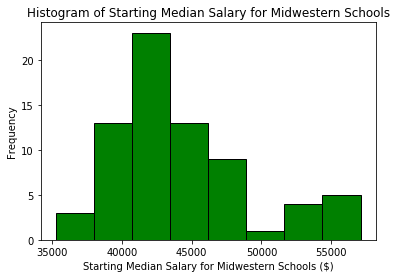

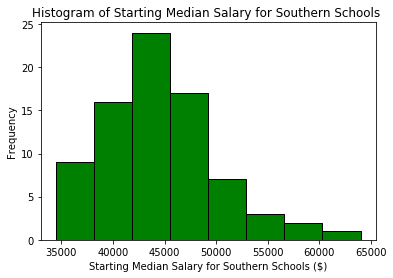

In [9]:
#turning the dataframe into lists for easier analysis
start_ms_mid = list(data['start_median'][0:71])
start_ms_sou = list(data['start_median'][71:150])

print(start_ms_mid)
print(start_ms_sou)

#creating histogram for starting median salary for Midwestern schools
plt.hist(start_ms_mid, 8, facecolor='green', ec='black')

#formatting the figure
plt.xlabel("Starting Median Salary for Midwestern Schools ($)")
plt.ylabel("Frequency")
plt.title("Histogram of Starting Median Salary for Midwestern Schools")
plt.show()

#creating histogram for starting median salary for Southern schools
plt.hist(start_ms_sou, 8, facecolor='green', ec='black')

#formatting the figure
plt.xlabel("Starting Median Salary for Southern Schools ($)")
plt.ylabel("Frequency")
plt.title("Histogram of Starting Median Salary for Southern Schools ")
plt.show()

# Appendix C: Confidence Interval

In [10]:
#finding confidence interval for starting median salary

#inputting necessary values from earlier calculations
z_score = 1.96
std_M = 5068.240560
std_S = 5626.099229
count_M = 71
count_S = 79
mean_M = 44225.352113
mean_S = 44521.518987

#confidence interval for Midwestern schools

#finding the standard error
st_error_M = std_M / (count_M ** 0.5)

#finding the margin of error
margin_error_M = z_score * st_error_M

#finding the lower and upper confidence interval
upper_M = mean_M + margin_error_M
lower_M = mean_M - margin_error_M

#printing relevant values
print("Confidence interval for mean starting median salary for Midwestern schools:")
print("")
print("z_score =", z_score)
print("standard error =", st_error_M)
print("margin of error =",margin_error_M)
print("upper confidence level =",upper_M)
print("lower confidence level =",lower_M)
print("Hence, the confidence interval is = (",lower_M,(","),upper_M,(")"))

#confidence interval for Southern schools with same procedure as for Midwestern
st_error_S = std_S / (count_S ** 0.5)
margin_error_S = z_score * st_error_S
upper_S = mean_S + margin_error_S
lower_S = mean_S - margin_error_S

#printing relevant values
print("")
print("Confidence interval for mean starting median salary for Midwestern schools:")
print("")
print("z_score =", z_score)
print("standard error =", st_error_S)
print("margin of error =",margin_error_S)
print("upper confidence level =",upper_S)
print("lower confidence level =",lower_S)
print("Hence, the confidence interval is = (",lower_S,(","),upper_S,(")"))

Confidence interval for mean starting median salary for Midwestern schools:

z_score = 1.96
standard error = 601.4894935922143
margin of error = 1178.91940744074
upper confidence level = 45404.27152044074
lower confidence level = 43046.43270555926
Hence, the confidence interval is = ( 43046.43270555926 , 45404.27152044074 )

Confidence interval for mean starting median salary for Midwestern schools:

z_score = 1.96
standard error = 632.9856171957132
margin of error = 1240.6518097035978
upper confidence level = 45762.1707967036
lower confidence level = 43280.86717729641
Hence, the confidence interval is = ( 43280.86717729641 , 45762.1707967036 )


# Appendix D: Difference of Means Test

In [11]:
#performing one-sided difference of means significance test

#inputting necessary values from earlier calculations
mean_M = 44225.352113
mean_S = 44521.518987
std_M = 5068.240560
std_S = 5626.099229
count_M = 71
count_S = 79
null_value = 0

#finding the point estimate
point_estimate = mean_S - mean_M
print("Point estimate =",point_estimate)

#finding the standard error
st_error = (((std_S ** 2) / count_S) + ((std_M ** 2) / count_M)) ** 0.5
print("Standard error =",st_error)

#finding the test statistics
test_statistics = (point_estimate - null_value) / st_error
print("Test statistics =",test_statistics)

#We are interested in a one-sided test. Due to the symmetry, the p-value
#of a one-sided test is the p-value for a two sided test divided by 2
t_stat, p_val = stats.ttest_ind(start_ms_mid, start_ms_sou, equal_var=False)
print("P-value =", p_val / 2)

Point estimate = 296.1668740000023
Standard error = 873.1897860593975
Test statistics = 0.33917812453644064
P-value = 0.3674781686944153


# Appendix E: Hedge's g

In [12]:
#computing Hedge's g

#inputting necessary values from earlier calculations
mean_M = 44225.35
mean_S = 44521.52
std_M = 5068.240560
std_S = 5626.099229

#finding pooled standard deviation
std_pooled = (((std_M ** 2) + (std_S ** 2)) / 2) ** 0.5
print("Pooled standard deviation =", std_pooled)

#computing Hedge's g
hedges_g = (mean_S - mean_M) / std_pooled
print("Hedge's g =",hedges_g)

Pooled standard deviation = 5354.43997578568
Hedge's g = 0.0553129741559088
